# Introduction to Deep Learning

1. In this notebook we will be creating a number prediction Deep learning model under Keras framework.
2. Keras is a simple and easy framework and it is the framework to get started with Deep Learning. Keras is built on top of tensorflow(tensorflow is a Deep Learning framework developed by google) or other framework.
3. So, Here we use mnist dataset and we will train our model

In [1]:
# importing the tensorflow 
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [2]:
#Normalising the data
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)
x_train.shape

(60000, 28, 28)

In [3]:
# define the sequential model
model = tf.keras.models.Sequential()
# input layer should be flattened
model.add(tf.keras.layers.Flatten(input_shape=x_train.shape[1:])) 
# Hiddent layer (128 neuron)
model.add(tf.keras.layers.Dense(128,activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation = tf.nn.softmax))

#Compile
model.compile(optimizer ='adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

#training

model.fit(x_train,y_train,epochs=3)

Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2644 - accuracy: 0.9224
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1105 - accuracy: 0.9659
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0740 - accuracy: 0.9771


In [4]:
# Testing our model
val_loss,val_acu = model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1059 - accuracy: 0.9681


In [0]:
#Saving our model
model.save("./my-first-model.h5")

In [0]:
#creating a new model from saved model
new_model = tf.keras.models.load_model("my-first-model.h5")

In [7]:
# testing dataset's shape
x_test.shape

(10000, 28, 28)

In [0]:
# Now predicting the output for new test set
prediction = new_model.predict([x_test])

In [9]:
print(prediction)

[[1.0611258e-08 3.5436869e-08 2.2470267e-06 ... 9.9999297e-01
  1.3088691e-08 4.4902151e-07]
 [1.2283277e-09 6.0718269e-03 9.9343383e-01 ... 2.4138515e-08
  3.6552134e-05 2.4794719e-10]
 [4.0247534e-07 9.9941242e-01 2.4502665e-06 ... 4.5135195e-05
  4.3249677e-04 2.8375827e-05]
 ...
 [6.5050392e-09 1.5153987e-07 4.1611866e-08 ... 2.9843342e-05
  2.1159606e-06 5.5482681e-04]
 [5.9475806e-08 5.1412464e-08 1.8763888e-09 ... 2.6260720e-08
  1.9975771e-05 1.0251591e-08]
 [2.8681962e-08 2.9132192e-08 9.8116672e-08 ... 3.2436636e-12
  1.9864723e-08 1.4922311e-10]]


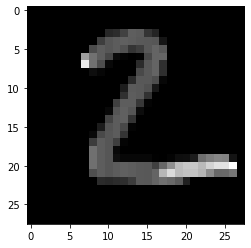

2


In [10]:
# Checking our prediction
# you can change the value of i and try for different input image and it will give the output
import numpy as np
import matplotlib.pyplot as plt
i=1   # give different value for i and run the cell (Shift + enter)
plt.imshow(x_test[i],cmap="gray")
plt.show()
print(np.argmax(prediction[i]))
